In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("../../results/preprocessing.csv")

In [78]:
# This step should be reference independent. 
df['reference'] = df['file'].str.split('.').str[1]
df = df[df['reference']=='uganda']

In [79]:
### Fix columns

header_string = df.columns[1]  # Second column header from dataframe
header_list = [h.strip() for h in header_string.split(',')]

# Ensure the column to split is a string
df.iloc[:, 1] = df.iloc[:, 1].astype(str)

# Split that column into multiple columns
expanded = df.iloc[:, 1].str.split(',', expand=True)
assert expanded.shape[1] == len(header_list), "The number of headers does not match number of columns to split!"

expanded.columns = header_list

# Concatenate all together
df = pd.concat([df.iloc[:, [0]], expanded, df.iloc[:, 2:]], axis=1)

In [80]:
df['batch'] = df['filepath'].str.split('/').str[1]
df['sample'] = df['filepath'].str.split('/').str[2]

In [81]:
df.columns

Index(['Unnamed: 0', '', 'Input sequences (file 1)', 'Input bases (file 1)',
       'Input mean length (file 1)', 'Input sequences (file 2)',
       'Input bases (file 2)', 'Input mean length (file 2)',
       'Good sequences (pairs)', 'Good bases (pairs)',
       'Good mean length (pairs)', 'Good sequences (singletons file 1)',
       'Good bases (singletons file 1)',
       'Good mean length (singletons file 1)',
       'Good sequences (singletons file 2)', 'Good bases (singletons file 2)',
       'Good mean length (singletons file 2)', 'Bad sequences (file 1)',
       'Bad bases (file 1)', 'Bad mean length (file 1)',
       'Bad sequences (file 2)', 'Bad bases (file 2)',
       'Bad mean length (file 2)', 'trim_qual_left', 'min_len',
       'min_qual_mean', 'ns_max_n', 'filepath', 'file', 'reference', 'batch',
       'sample'],
      dtype='object')

In [82]:
df = df[df['Input sequences (file 1)']!='']

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1271: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


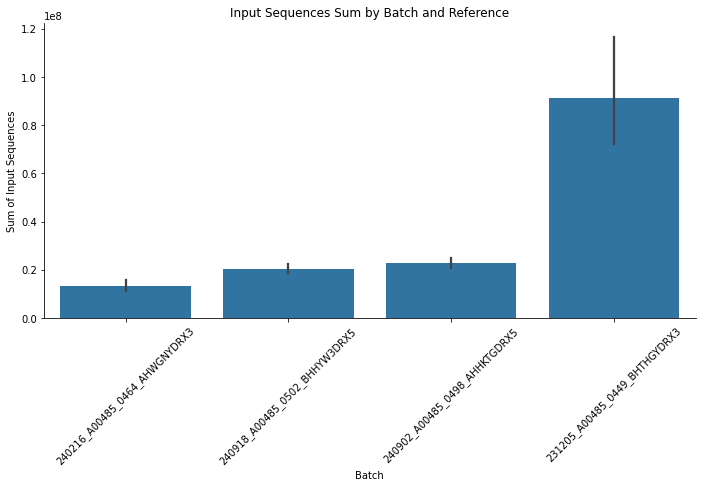

In [83]:
df['input_sequences'] = df['Input sequences (file 1)'].astype(float) + df['Input sequences (file 2)'].astype(float)

sns.catplot(
    data=df,
    x='batch',
    y='input_sequences',
    #hue='reference',
    kind='bar',
    height=5,
    aspect=2
)
plt.title('Input Sequences Sum by Batch and Reference')
plt.xlabel('Batch')
plt.ylabel('Sum of Input Sequences')
plt.xticks(rotation=45)
plt.show()

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1271: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


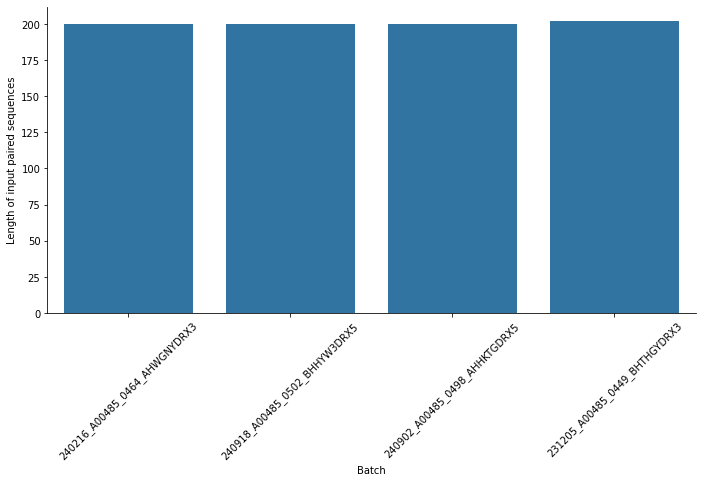

In [84]:
df['input_length'] = df['Input mean length (file 2)'].astype(float) + df['Input mean length (file 1)'].astype(float)

sns.catplot(
    data=df,
    x='batch',
    y='input_length',
    #hue='reference',
    kind='bar',
    height=5,
    aspect=2
)
plt.title('')
plt.xlabel('Batch')
plt.ylabel('Length of input paired sequences')
plt.xticks(rotation=45)
plt.show()

In [87]:
df[['input_sequences', 
    'good_sequences', 
    'bad_sequences', 
    'Good sequences (pairs)', 
   'Good sequences (singletons file 2)', 
   'Good sequences (singletons file 1)']]

,input_sequences,good_sequences,bad_sequences,Good sequences (pairs),Good sequences (singletons file 2),Good sequences (singletons file 1)
0,11671716.0,5552473.0,1157937.0,4677921.0,458944.0,415608.0
1,30615372.0,14286278.0,3345659.0,11962027.0,750983.0,1573268.0
2,12856634.0,6028567.0,1402047.0,5026270.0,382361.0,619936.0
3,8950604.0,4144250.0,1115586.0,3359716.0,575194.0,209340.0
4,23755306.0,11184129.0,2261601.0,9616052.0,510829.0,1057248.0
...,...,...,...,...,...,...
235,75410820.0,35104570.0,5974145.0,31731265.0,1557893.0,1815412.0
236,15935132.0,7311537.0,1746353.0,6221213.0,480134.0,610190.0
237,24393846.0,11215483.0,2656971.0,9539952.0,669633.0,1005898.0
238,21220206.0,9891759.0,3468934.0,7141169.0,2139504.0,611086.0


/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1271: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` i

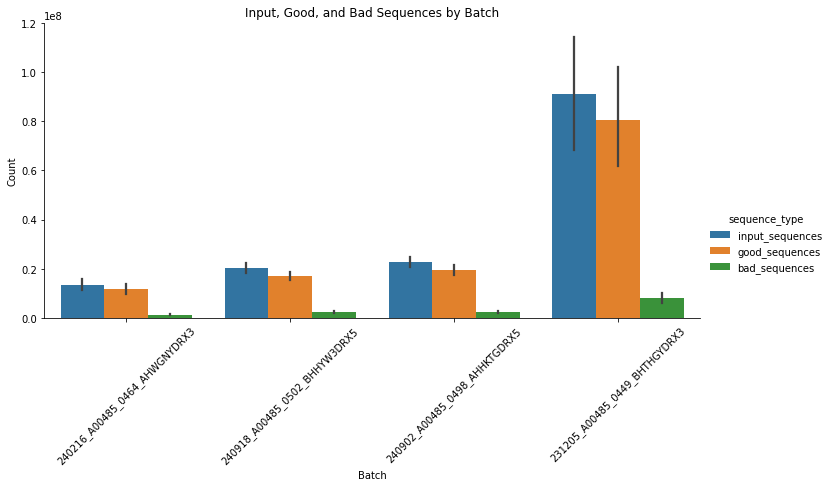

In [88]:
df['input_sequences'] = df['Input sequences (file 1)'].astype(float) + df['Input sequences (file 2)'].astype(float)
df['good_sequences'] = 2*df['Good sequences (pairs)'].astype(float) + df['Good sequences (singletons file 2)'].astype(float) + df['Good sequences (singletons file 1)'].astype(float)
df['bad_sequences'] =  df['Bad sequences (file 1)'].astype(float) + df['Bad sequences (file 2)'].astype(float)
    
df_melt = df.melt(
    id_vars=['batch'],
    value_vars=['input_sequences', 'good_sequences', 'bad_sequences'],
    var_name='sequence_type',
    value_name='count'
)

sns.catplot(
    data=df_melt,
    x='batch',
    y='count',
    hue='sequence_type',
    kind='bar',
    height=5,
    aspect=2
)
plt.title('Input, Good, and Bad Sequences by Batch')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[[
    'Good sequences (pairs)', 
    'Good sequences (singletons file 1)',
    'Good sequences (singletons file 2)', 
    'Good bases (singletons file 2)',
    'Good mean length (singletons file 2)', 
    'Bad sequences (file 1)',
    'Bad mean length (file 1)',
    'Bad sequences (file 2)', 
    'Bad mean length (file 2)',
    'batch',
    'sample',
    'reference']]

In [27]:
df[['Input sequences (file 1)', 
    'Input sequences (file 2)',
    'Input mean length (file 2)',
    'Good sequences (pairs)', 
    'Good bases (pairs)',
    'Good mean length (pairs)', 
    'Good sequences (singletons file 1)',
    'Good mean length (singletons file 1)',
    'Good sequences (singletons file 2)', 
    'Good bases (singletons file 2)',
    'Good mean length (singletons file 2)', 
    'Bad sequences (file 1)',
    'Bad mean length (file 1)',
    'Bad sequences (file 2)', 
    'Bad mean length (file 2)',  
    'reference']]

,Unnamed: 0,,Input sequences (file 1),Input bases (file 1),Input mean length (file 1),Input sequences (file 2),Input bases (file 2),Input mean length (file 2),Good sequences (pairs),Good bases (pairs),...,Bad sequences (file 2),Bad bases (file 2),Bad mean length (file 2),trim_qual_left,min_len,min_qual_mean,ns_max_n,filepath,file,reference
0,0,0,5835858.0,583585800.0,100.0,5835858.0,583585800.0,100.0,4677921.0,933856641.0,...,415608.0,41560800.0,100.0,104295.0,1336360.0,633.0,34.0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/preprocessing.uganda.csv,uganda
1,1,0,15307686.0,1530768600.0,100.0,15307686.0,1530768600.0,100.0,11962027.0,2387085497.0,...,1573268.0,157326800.0,100.0,383464.0,3982401.0,1158.0,44.0,results_uganda/240918_A00485_0502_BHHYW3DRX5/H...,results_uganda/csv_files/preprocessing.uganda.csv,uganda
2,2,0,6428317.0,642831700.0,100.0,6428317.0,642831700.0,100.0,5026270.0,1003394351.0,...,619936.0,61993600.0,100.0,164807.0,1636184.0,586.0,220.0,results_uganda/240918_A00485_0502_BHHYW3DRX5/H...,results_uganda/csv_files/preprocessing.uganda.csv,uganda
3,3,0,4475302.0,447530200.0,100.0,4475302.0,447530200.0,100.0,3359716.0,669907914.0,...,209340.0,20934000.0,100.0,110008.0,1336236.0,394.0,,results_uganda/240902_A00485_0498_AHHKTGDRX5/H...,results_uganda/csv_files/preprocessing.uganda.csv,uganda
4,4,0,11877653.0,1187765300.0,100.0,11877653.0,1187765300.0,100.0,9616052.0,1919523598.0,...,1057248.0,105724800.0,100.0,255290.0,2698548.0,884.0,403.0,results_uganda/240918_A00485_0502_BHHYW3DRX5/H...,results_uganda/csv_files/preprocessing.uganda.csv,uganda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,235,0,37705410.0,3770541000.0,100.0,37705410.0,3770541000.0,100.0,31731265.0,6336009175.0,...,1815412.0,181541200.0,100.0,756308.0,7817118.0,1549.0,10.0,results_sudan/240902_A00485_0498_AHHKTGDRX5/HE...,results_sudan/csv_files/preprocessing.sudan.csv,sudan
476,236,0,7967566.0,796756600.0,100.0,7967566.0,796756600.0,100.0,6221213.0,1241776183.0,...,610190.0,61019000.0,100.0,209100.0,2192604.0,675.0,3.0,results_sudan/240902_A00485_0498_AHHKTGDRX5/HE...,results_sudan/csv_files/preprocessing.sudan.csv,sudan
477,237,0,12196923.0,1219692300.0,100.0,12196923.0,1219692300.0,100.0,9539952.0,1904409698.0,...,1005898.0,100589800.0,100.0,332899.0,3304369.0,1139.0,4.0,results_sudan/240902_A00485_0498_AHHKTGDRX5/HE...,results_sudan/csv_files/preprocessing.sudan.csv,sudan
478,238,0,10610103.0,1061010300.0,100.0,10610103.0,1061010300.0,100.0,7141169.0,1419548923.0,...,611086.0,61108600.0,100.0,225490.0,3960995.0,685.0,108.0,results_sudan/240918_A00485_0502_BHHYW3DRX5/HE...,results_sudan/csv_files/preprocessing.sudan.csv,sudan
